In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<Axes: xlabel='Date'>

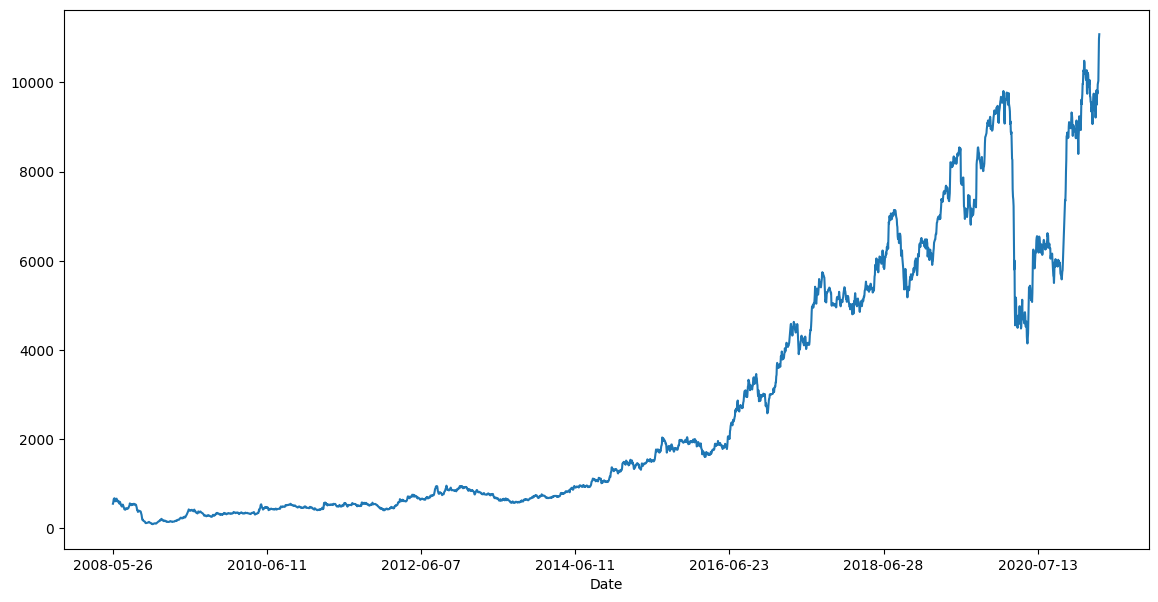

In [10]:
df = pd.read_csv('NIFTY-50-StockData/BAJAJFINSV.csv')
df.set_index("Date", drop=False, inplace=True)
df.head()

df.VWAP.plot(figsize=(14, 7))

In [15]:
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(numeric_only=True), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,9.306703e+13,3.202323e+13,4.039685e+13,5.419115e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,1.726368e+14,3.202323e+13,4.039685e+13,5.419115e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,2.107369e+14,5.388164e+13,5.388164e+13,5.388164e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,2.350756e+14,5.682195e+13,5.682195e+13,5.682195e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,2.508797e+14,2.541759e+13,5.613884e+13,5.613884e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516


In [17]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,5.419115e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,26,0
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,5.419115e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,27,1
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,5.388164e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,28,2
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,5.682195e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,29,3
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,5.613884e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,30,4


In [71]:
df_train = df[df.Date < "2019"]
df_valid = df[(df.Date >= "2019") & (df.Date < "2020")]

In [162]:
exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "day", "day_of_week"]

In [163]:
from pmdarima.arima import auto_arima

model = auto_arima(df_train.VWAP, 
                   df_train[exogenous_features], 
                   trace=True, 
                   suppress_warnings=True,
                   seasonal=False,
                   )

C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=29821.593, Time=7.46 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47842.744, Time=4.27 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=29678.281, Time=4.20 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=30126.888, Time=3.99 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=29787.852, Time=4.12 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29879.078, Time=4.78 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=29817.196, Time=5.54 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29681.026, Time=5.00 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 39.395 seconds


In [164]:
# Summary of the best ARIMA model found
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2624
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -14804.140
Date:                Sat, 14 Dec 2024   AIC                          29678.281
Time:                        21:41:11   BIC                          29883.817
Sample:                             0   HQIC                         29752.717
                               - 2624                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
High_mean_lag3          0.8050   7.65e-24   1.05e+23      0.000       0.805       0.805
High_std_lag3           0.4457   1.31e-25    3.4e+24      0.000       0.446       0.446
Low_mean_lag3   

In [165]:
forecast = model.predict(len(df_valid), df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast.values

C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\AppData\Local\Temp\ipykernel_28660\1289016478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [159]:
df_valid[exogenous_features]

,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,Volume_mean_lag3,Volume_std_lag3,Turnover_mean_lag3,Turnover_std_lag3,Trades_mean_lag3,Trades_std_lag3,...,Low_std_lag30,Volume_mean_lag30,Volume_std_lag30,Turnover_mean_lag30,Turnover_std_lag30,Trades_mean_lag30,Trades_std_lag30,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,6557.066895,31.205982,6399.600098,44.546154,234137.328125,55120.183594,1.517021e+14,3.499529e+13,26134.333984,3679.255615,...,269.403351,205049.562500,67001.023438,1.241826e+14,4.318489e+13,25891.400391,8638.332031,1,1,1
2019-01-02,6550.399902,35.333836,6422.266602,12.365005,182172.000000,35037.214844,1.183077e+14,2.297227e+13,20343.333984,6356.207031,...,275.852722,205072.265625,66978.734375,1.245805e+14,4.281648e+13,25664.966797,8888.932617,1,2,2
2019-01-03,6549.066895,36.543308,6404.733398,39.794640,189327.671875,41949.824219,1.225909e+14,2.699117e+13,19576.333984,5837.918457,...,278.301514,209169.328125,63915.414062,1.274602e+14,4.091563e+13,25952.466797,8597.575195,1,3,3
2019-01-04,6511.966797,27.842474,6369.883301,44.015236,192980.000000,44388.074219,1.242167e+14,2.809233e+13,19538.333984,5793.296875,...,277.394562,212287.640625,61777.156250,1.297480e+14,3.946444e+13,26132.199219,8495.645508,1,4,4
2019-01-07,6488.633301,33.855625,6349.549805,15.574258,197814.000000,36034.648438,1.269671e+14,2.334459e+13,21066.333984,3259.205811,...,277.433960,210364.234375,62613.792969,1.289572e+14,3.982287e+13,25801.500000,8632.119141,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,9353.933594,18.974018,9259.116211,2.211523,157739.000000,18989.744141,1.467850e+14,1.767149e+13,23179.666016,3303.510254,...,149.237686,205272.359375,63839.558594,1.868786e+14,5.743528e+13,24932.033203,7921.739258,12,24,1
2019-12-26,9343.633789,22.976147,9257.683594,4.677161,145844.671875,39577.152344,1.356935e+14,3.686240e+13,20177.000000,8254.392578,...,145.612350,202778.437500,66471.007812,1.848144e+14,5.968635e+13,24581.533203,8309.420898,12,26,3
2019-12-27,9363.299805,32.570999,9267.683594,19.783220,144957.000000,38866.359375,1.352073e+14,3.647229e+13,17202.333984,6231.735840,...,146.786224,196256.234375,59698.457031,1.791913e+14,5.388019e+13,23926.867188,8054.750488,12,27,4


<Axes: xlabel='Date'>

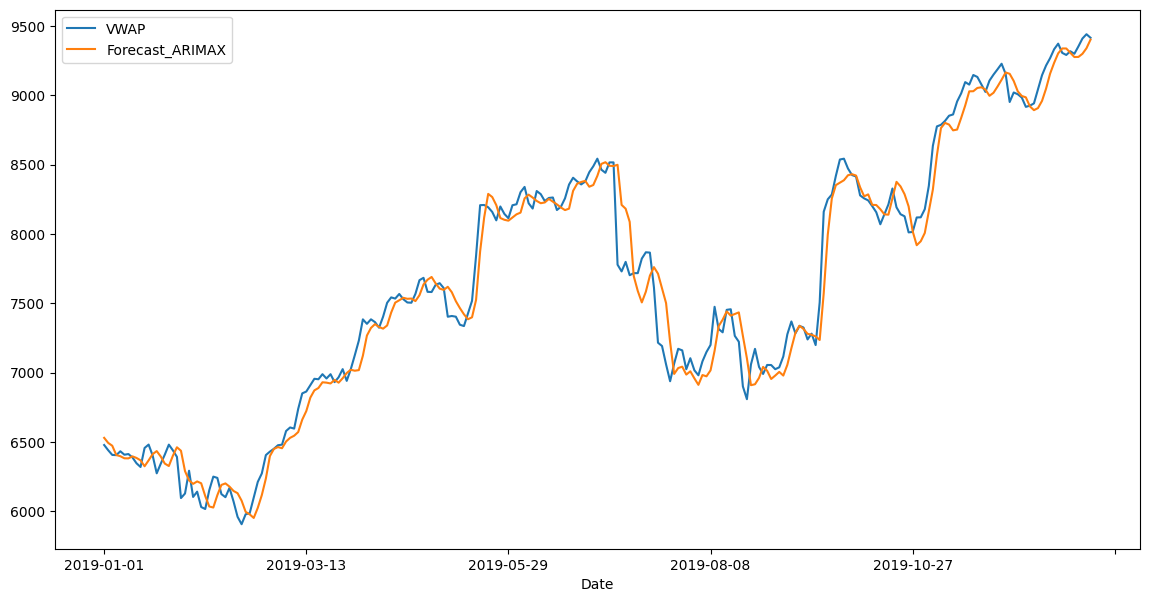

In [166]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [167]:
MAPE_Naive = np.mean(100*(df_valid['VWAP'].shift(1)-df_valid['VWAP'])/df_valid['VWAP'])
MAPE = np.mean(100.*(df_valid["Forecast_ARIMAX"]-df_valid["VWAP"])/df_valid["VWAP"])
print("MAPE[Naive]:", MAPE_Naive)
print("MAPE:", MAPE)

MAPE[Naive]: -0.1414669522433605
MAPE: -0.27445867106965627


In [155]:
df_valid[exogenous_features].iloc[10:11]

,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,Volume_mean_lag3,Volume_std_lag3,Turnover_mean_lag3,Turnover_std_lag3,Trades_mean_lag3,Trades_std_lag3,...,Low_std_lag30,Volume_mean_lag30,Volume_std_lag30,Turnover_mean_lag30,Turnover_std_lag30,Trades_mean_lag30,Trades_std_lag30,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-15,6402.933105,23.445753,6297.899902,36.837887,146518.671875,21748.21875,9.307702e+13,1.404481e+13,20555.333984,8143.464844,...,262.070587,192954.859375,61390.964844,1.200025e+14,3.888199e+13,23672.933594,8860.415039,1,15,1


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
                 Date   Actual    Predicted
Date                                       
2019-01-01 2019-01-01  6477.89  6471.641662
2019-01-02 2019-01-02  6440.03  6463.020819
2019-01-03 2019-01-03  6406.39  6453.064055
2019-01-04 2019-01-04  6404.79  6389.794840
2019-01-07 2019-01-07  6432.71  6382.691114


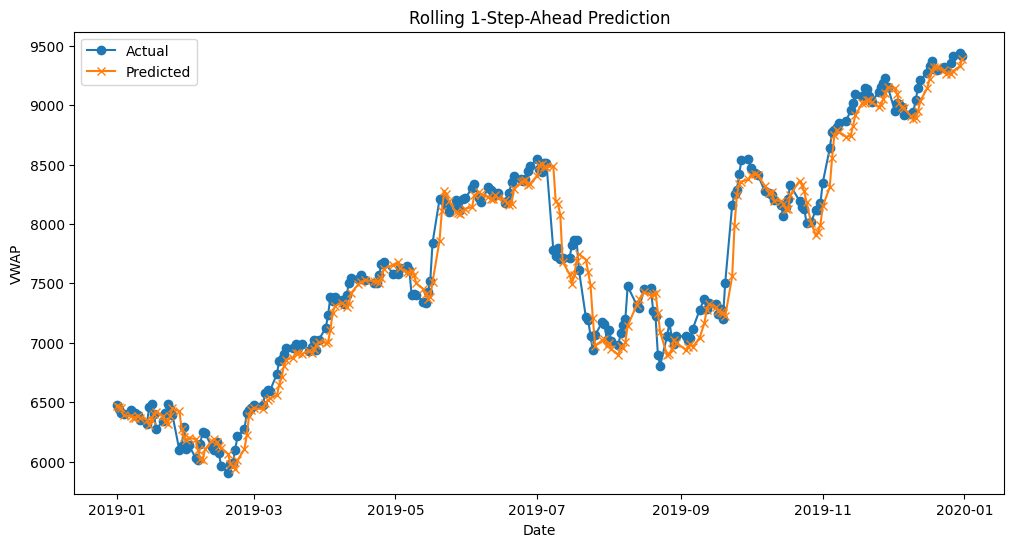

In [208]:
# Initialize lists to store predictions and actual values
rolling_predictions = []
rolling_actuals = df_valid['VWAP']  # Ground truth values
exog_features = df_valid[exogenous_features]  # Exogenous variables for validation

# Copy the model to avoid modifying the original fitted model
rolling_model = model  # Using the already fitted auto_arima model

# Start the rolling prediction process
for t in range(len(df_valid)):
    # Prepare the current exogenous variable for prediction
    exog_current = exog_features.iloc[t:t+1]  # Exogenous variables for this time step
    
    # Predict the next step
    forecast = rolling_model.predict(1, exog_current)[0]
    rolling_predictions.append(forecast)
    
    # Update the model with the actual observation and its exogenous variable
    #rolling_model.update(df_valid['VWAP'].iloc[t:t+1], exog_current, update_params=False)
    print(t)

# Combine predictions into a DataFrame for analysis
df_rolling = pd.DataFrame({
    'Date': df_valid['Date'],
    'Actual': rolling_actuals,
    'Predicted': rolling_predictions
})

# Print the results
print(df_rolling.head())

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_rolling['Date'], df_rolling['Actual'], label='Actual', marker='o')
plt.plot(df_rolling['Date'], df_rolling['Predicted'], label='Predicted', marker='x')
plt.legend()
plt.title('Rolling 1-Step-Ahead Prediction')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.show()


In [209]:
MAPE = np.mean( 100*(df_rolling['Predicted'] - df_rolling['Actual'])/df_rolling['Actual'] )
MAPE_naive = np.mean( 100*(df_rolling['Actual'].shift(1) - df_rolling['Actual'])/df_rolling['Actual'] )

print("MAPE[Naive]:", MAPE_Naive)
print("MAPE:", MAPE)

MAPE[Naive]: -0.1414669522433605
MAPE: -0.4585961370041604


In [202]:
rolling_model.

-0.1414669522433605

In [178]:
df_rolling['Predicted'].values

array([2624    6529.661322
       dtype: float64     , array([6473.84371627]),
       array([6453.06405455]), array([6381.02847168]),
       array([6396.75165432]), array([6395.27120661]),
       array([6391.05210669]), array([6407.62856263]),
       array([6381.62910862]), array([6353.2150575]),
       array([6306.89709447]), array([6416.17975462]),
       array([6454.38105302]), array([6430.13341333]),
       array([6335.22158069]), array([6324.91147783]),
       array([6350.19101684]), array([6457.81663885]),
       array([6475.93462707]), array([6410.78040681]),
       array([6163.10525267]), array([6163.3435531]),
       array([6223.25242249]), array([6180.22723431]),
       array([6174.56902912]), array([6046.66323857]),
       array([5999.71973006]), array([6070.34606482]),
       array([6198.72462011]), array([6235.94867431]),
       array([6176.5091928]), array([6141.00071118]),
       array([6142.98631067]), array([6102.35791448]),
       array([6013.33854333]), array([5932.7

C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4371.968, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5300.100, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5173.589, Time=0.11 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5218.538, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5298.455, Time=0.16 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.36 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5131.354, Time=0.44 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5160.210, Time=0.20 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5033.661, Time=0.91 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.40 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.77 sec


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4379.482, Time=0.88 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 11.936 seconds


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\AppData\Local\Temp\ipykernel_28660\2393938743.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Forecast'] = forecast


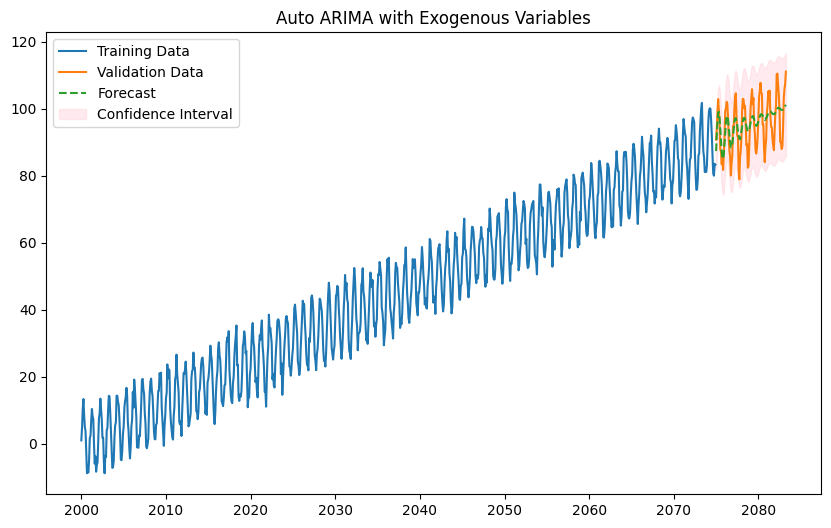

In [149]:
import numpy as np
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Generate a synthetic time series with a trend and seasonality
np.random.seed(42)
n_periods = 1000  # 10 years of monthly data
time = np.arange(n_periods)

# Main time series (target variable)
trend = 0.1 * time
seasonality = 10 * np.sin(2 * np.pi * time / 12)
noise = np.random.normal(scale=2, size=n_periods)
y = trend + seasonality + noise

# Exogenous variables
exog1 = np.random.normal(size=n_periods)  # Random noise
exog2 = np.cos(2 * np.pi * time / 12)    # Seasonal pattern
exog = pd.DataFrame({'exog1': exog1, 'exog2': exog2})

# Create a DataFrame
df = pd.DataFrame({'Date': pd.date_range(start='2000-01', periods=n_periods, freq='MS'),
                   'y': y,
                   'exog1': exog1,
                   'exog2': exog2})
df.set_index('Date', inplace=True)

# Split into train and validation sets
train = df.iloc[:int(0.9*n_periods)]
valid = df.iloc[int(0.9*n_periods):]

# Fit the auto_arima model with exogenous variables
model = auto_arima(
    train['y'],
    train[['exog1', 'exog2']],
    seasonal=False,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

# Forecast the validation period
forecast, conf_int = model.predict(
    len(valid),
    valid[['exog1', 'exog2']],
    return_conf_int=True
)

# Add forecast to the validation set
valid['Forecast'] = forecast

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['y'], label='Training Data')
plt.plot(valid.index, valid['y'], label='Validation Data')
plt.plot(valid.index, valid['Forecast'], label='Forecast', linestyle='--')
plt.fill_between(
    valid.index,
    conf_int[:, 0],
    conf_int[:, 1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)
plt.legend()
plt.title('Auto ARIMA with Exogenous Variables')
plt.show()


In [150]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  900
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2177.984
Date:                Fri, 13 Dec 2024   AIC                           4371.968
Time:                        16:06:37   BIC                           4410.378
Sample:                    01-01-2000   HQIC                          4386.641
                         - 12-01-2074                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0265      0.002     10.750      0.000       0.022       0.031
exog1         -0.0796      0.069     -1.158      0.247      -0.214       0.055
exog2         -0.2041      7.375     -0.028      0.9

In [96]:
model.params

<bound method ARIMA.params of ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)>

In [99]:
fm = model.arima_res_

fm.params

ar.L1       0.094958
ar.L2       0.036826
ma.L1      -0.955794
ar.S.L12    0.999348
ma.S.L12   -0.953339
ma.S.L24    0.073260
sigma2      3.905039
dtype: float64

In [119]:
from pmdarima import auto_arima

# Example exogenous variables
exog = pd.DataFrame({
    "feature1": np.sin(2 * np.pi * time / 50),
    "feature2": np.random.normal(0, 1, n_periods)
})

# Fit the model with exogenous variables
model = auto_arima(
    df['y'],
    exog,
    seasonal=False,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=nan sec


ValueError: Could not successfully fit a viable ARIMA model to input data.
See http://alkaline-ml.com/pmdarima/no-successful-model.html for more information on why this can happen.

In [117]:
model.arima_res_.params

intercept    0.029675
ar.L1        1.653042
ar.L2       -0.874934
ar.L3       -0.062880
ma.L1       -2.427962
ma.L2        2.049231
ma.L3       -0.613758
sigma2       4.628407
dtype: float64

In [114]:
model = model.fit(df['y'], exog)


C:\Users\jfuou\.pyenv\pyenv-win\versions\3.9.2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -262.451
Date:                Fri, 13 Dec 2024   AIC                            540.901
Time:                        15:40:51   BIC                            563.134
Sample:                    01-01-2000   HQIC                           549.929
                         - 12-01-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0297      0.005      5.946      0.000       0.020       0.039
ar.L1          1.6530      0.161     10.241      0.000       1.337       1.969
ar.L2         -0.8749      0.274     -3.193      0.001      -1.412      -0.338
ar.L3         -0.0629      0.155     -0.405      0.686      -0.367       0.242
ma.L1         -2.4280      0.160    -15.210      0.000      -2.741      -2.115
ma.L2          2.0492      0.300      6.824      0.000       1.461       2.638
ma.L3         -0.6138      0.146     -4.193      0.000      -0.901      -0.327
sigma2         4.6284      0.768      6.029      0.000       3.124       6.133
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.88   Prob(JB):                         0.70
Heteroskedasticity (H):               0.68   Skew:                             0.07
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""